In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Define column names
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# Load training data
train_data = pd.read_csv("adult.data", header=None, names=column_names, na_values=" ?", skipinitialspace=True)

# Load test data
test_data = pd.read_csv("adult.test", header=None, names=column_names, na_values=" ?", skipinitialspace=True, skipfooter=1)

# Display the first 5 rows of training data
train_data.head()

<ipython-input-2-b3b2ebb82046>:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("adult.test", header=None, names=column_names, na_values=" ?", skipinitialspace=True, skipfooter=1)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Check for missing values in training data
print("Missing values in training data:")
print(train_data.isnull().sum())

Missing values in training data:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [4]:
# Check for missing values in test data
print("Missing values in test data:")
print(test_data.isnull().sum())

Missing values in test data:
age               0
workclass         1
fnlwgt            1
education         1
education-num     1
marital-status    1
occupation        1
relationship      1
race              1
sex               1
capital-gain      1
capital-loss      1
hours-per-week    1
native-country    1
income            1
dtype: int64


In [5]:
# Drop rows with missing values
train_data = train_data.dropna()
test_data = test_data.dropna()

In [6]:
# Verify missing values are handled
print("Missing values after handling:")
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Missing values after handling:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [7]:
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [8]:
# Clean the target variable in test data
test_data["income"] = test_data["income"].str.rstrip(".")

# Verify the target variable
print(test_data["income"].unique())

['<=50K' '>50K']


<ipython-input-8-8210a654794e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["income"] = test_data["income"].str.rstrip(".")


In [9]:
# Combine training and test data for consistent encoding
combined_data = pd.concat([train_data, test_data])

# Perform one-hot encoding
combined_data = pd.get_dummies(combined_data, drop_first=True)

# Split back into training and test data
train_data = combined_data[:len(train_data)]
test_data = combined_data[len(train_data):]

# Display the first 5 rows after encoding
train_data.head()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,age_18,age_19,age_20,age_21,age_22,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,77516.0,13.0,2174.0,0.0,40.0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,83311.0,13.0,0.0,0.0,13.0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,215646.0,9.0,0.0,0.0,40.0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,234721.0,7.0,0.0,0.0,40.0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,338409.0,13.0,0.0,0.0,40.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# Separate features and target for training data
X_train = train_data.drop("income_>50K", axis=1)
y_train = train_data["income_>50K"]

# Separate features and target for test data
X_test = test_data.drop("income_>50K", axis=1)
y_test = test_data["income_>50K"]

# Display the shapes of the splits
print("Training data shapes:", X_train.shape, y_train.shape)
print("Test data shapes:", X_test.shape, y_test.shape)

Training data shapes: (32561, 244) (32561,)
Test data shapes: (16281, 244) (16281,)


In [11]:
# Check the distribution of the target variable in training data
print("Training target distribution:")
print(y_train.value_counts(normalize=True))

# Check the distribution of the target variable in test data
print("Test target distribution:")
print(y_test.value_counts(normalize=True))

Training target distribution:
income_>50K
False    0.75919
True     0.24081
Name: proportion, dtype: float64
Test target distribution:
income_>50K
False    0.763774
True     0.236226
Name: proportion, dtype: float64


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.86


In [13]:
pip install shap

In [14]:
import shap

explainer = shap.TreeExplainer(model)

In [18]:
shap_values = explainer.shap_values(X_test[:10], check_additivity=False)

print(shap_values[0])

[[ 4.25909594e+01 -4.34159927e+01]
 [ 4.14774761e+01  9.09336875e+00]
 [ 8.08032483e+01 -9.48134506e+01]
 [ 1.11904088e+02 -1.13229154e+02]
 [ 5.00644835e+01 -4.11949659e+01]
 [-5.77151871e+00  1.54303811e+01]
 [ 3.06371343e+01 -8.94825887e+00]
 [ 6.55068079e+01 -8.06436396e+01]
 [ 7.52491179e+01 -4.87873332e+01]
 [ 1.06247342e+02 -4.65251372e+01]
 [ 4.03506961e+01 -5.91772650e+01]
 [ 8.10677093e+01 -9.99623328e+01]
 [ 1.49856509e+02 -1.02257935e+02]
 [ 7.59342512e+01 -7.89937988e+01]
 [ 1.01157697e+02 -1.17188879e+02]
 [ 1.73800014e+02 -8.80639422e+01]
 [ 7.74859828e+01 -1.14331252e+02]
 [ 7.10153544e+01 -8.81247257e+01]
 [ 8.09161585e+01 -5.24633352e+01]
 [ 6.34693355e+01 -5.62581105e+01]
 [ 1.42085408e+02 -1.01061036e+02]
 [ 8.00176073e+01 -9.74251345e+01]
 [ 1.07131072e+02 -1.15575483e+02]
 [ 8.66787008e+01 -7.83021706e+01]
 [ 9.87553120e+01 -1.00045687e+02]
 [ 9.68142186e+01 -1.03671136e+02]
 [ 1.21254868e+02 -8.52517728e+01]
 [ 7.17113004e+01 -7.46183964e+01]
 [ 1.35844862e+02 -1

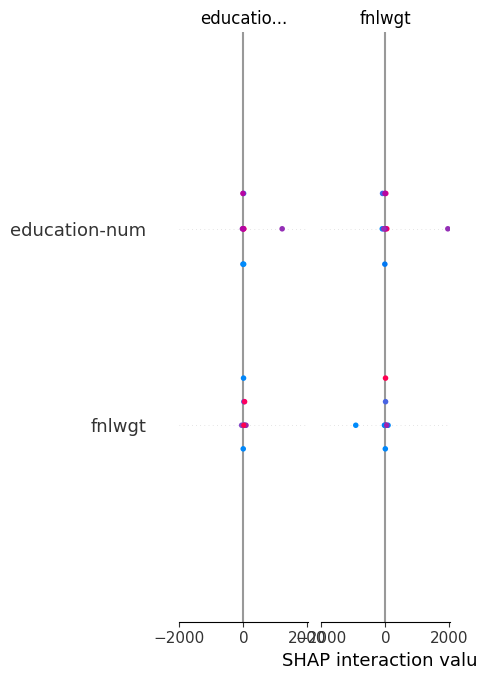

In [20]:
# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test[:10])